In [ ]:
import pandas as pd 
import numpy as np  
import re           
import matplotlib.pyplot as plt 
from matplotlib import pyplot as pp

import seaborn as sns  

import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv(r'G:\Hecker\Playground\TF3\Kaagle\Compe\Wellbeing_and_lifestyle_data_Kaggle.csv')
df

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,3/14/21 5:42,3,3,0,4,0,10,0,4,2,...,7,0,1,1,5,2,5,51 or more,Female,644.5
15968,3/14/21 6:30,3,3,6,8,7,4,6,3,1,...,6,0,0,2,10,5,8,21 to 35,Female,714.9
15969,3/14/21 8:35,4,3,0,10,10,8,6,5,1,...,7,0,1,2,10,1,10,21 to 35,Male,716.6
15970,3/14/21 8:43,1,1,10,8,2,7,3,2,1,...,8,7,2,2,1,6,8,21 to 35,Female,682.0


In [17]:
df['AGE']=df['AGE'].replace('Less than 20', '20 or less')


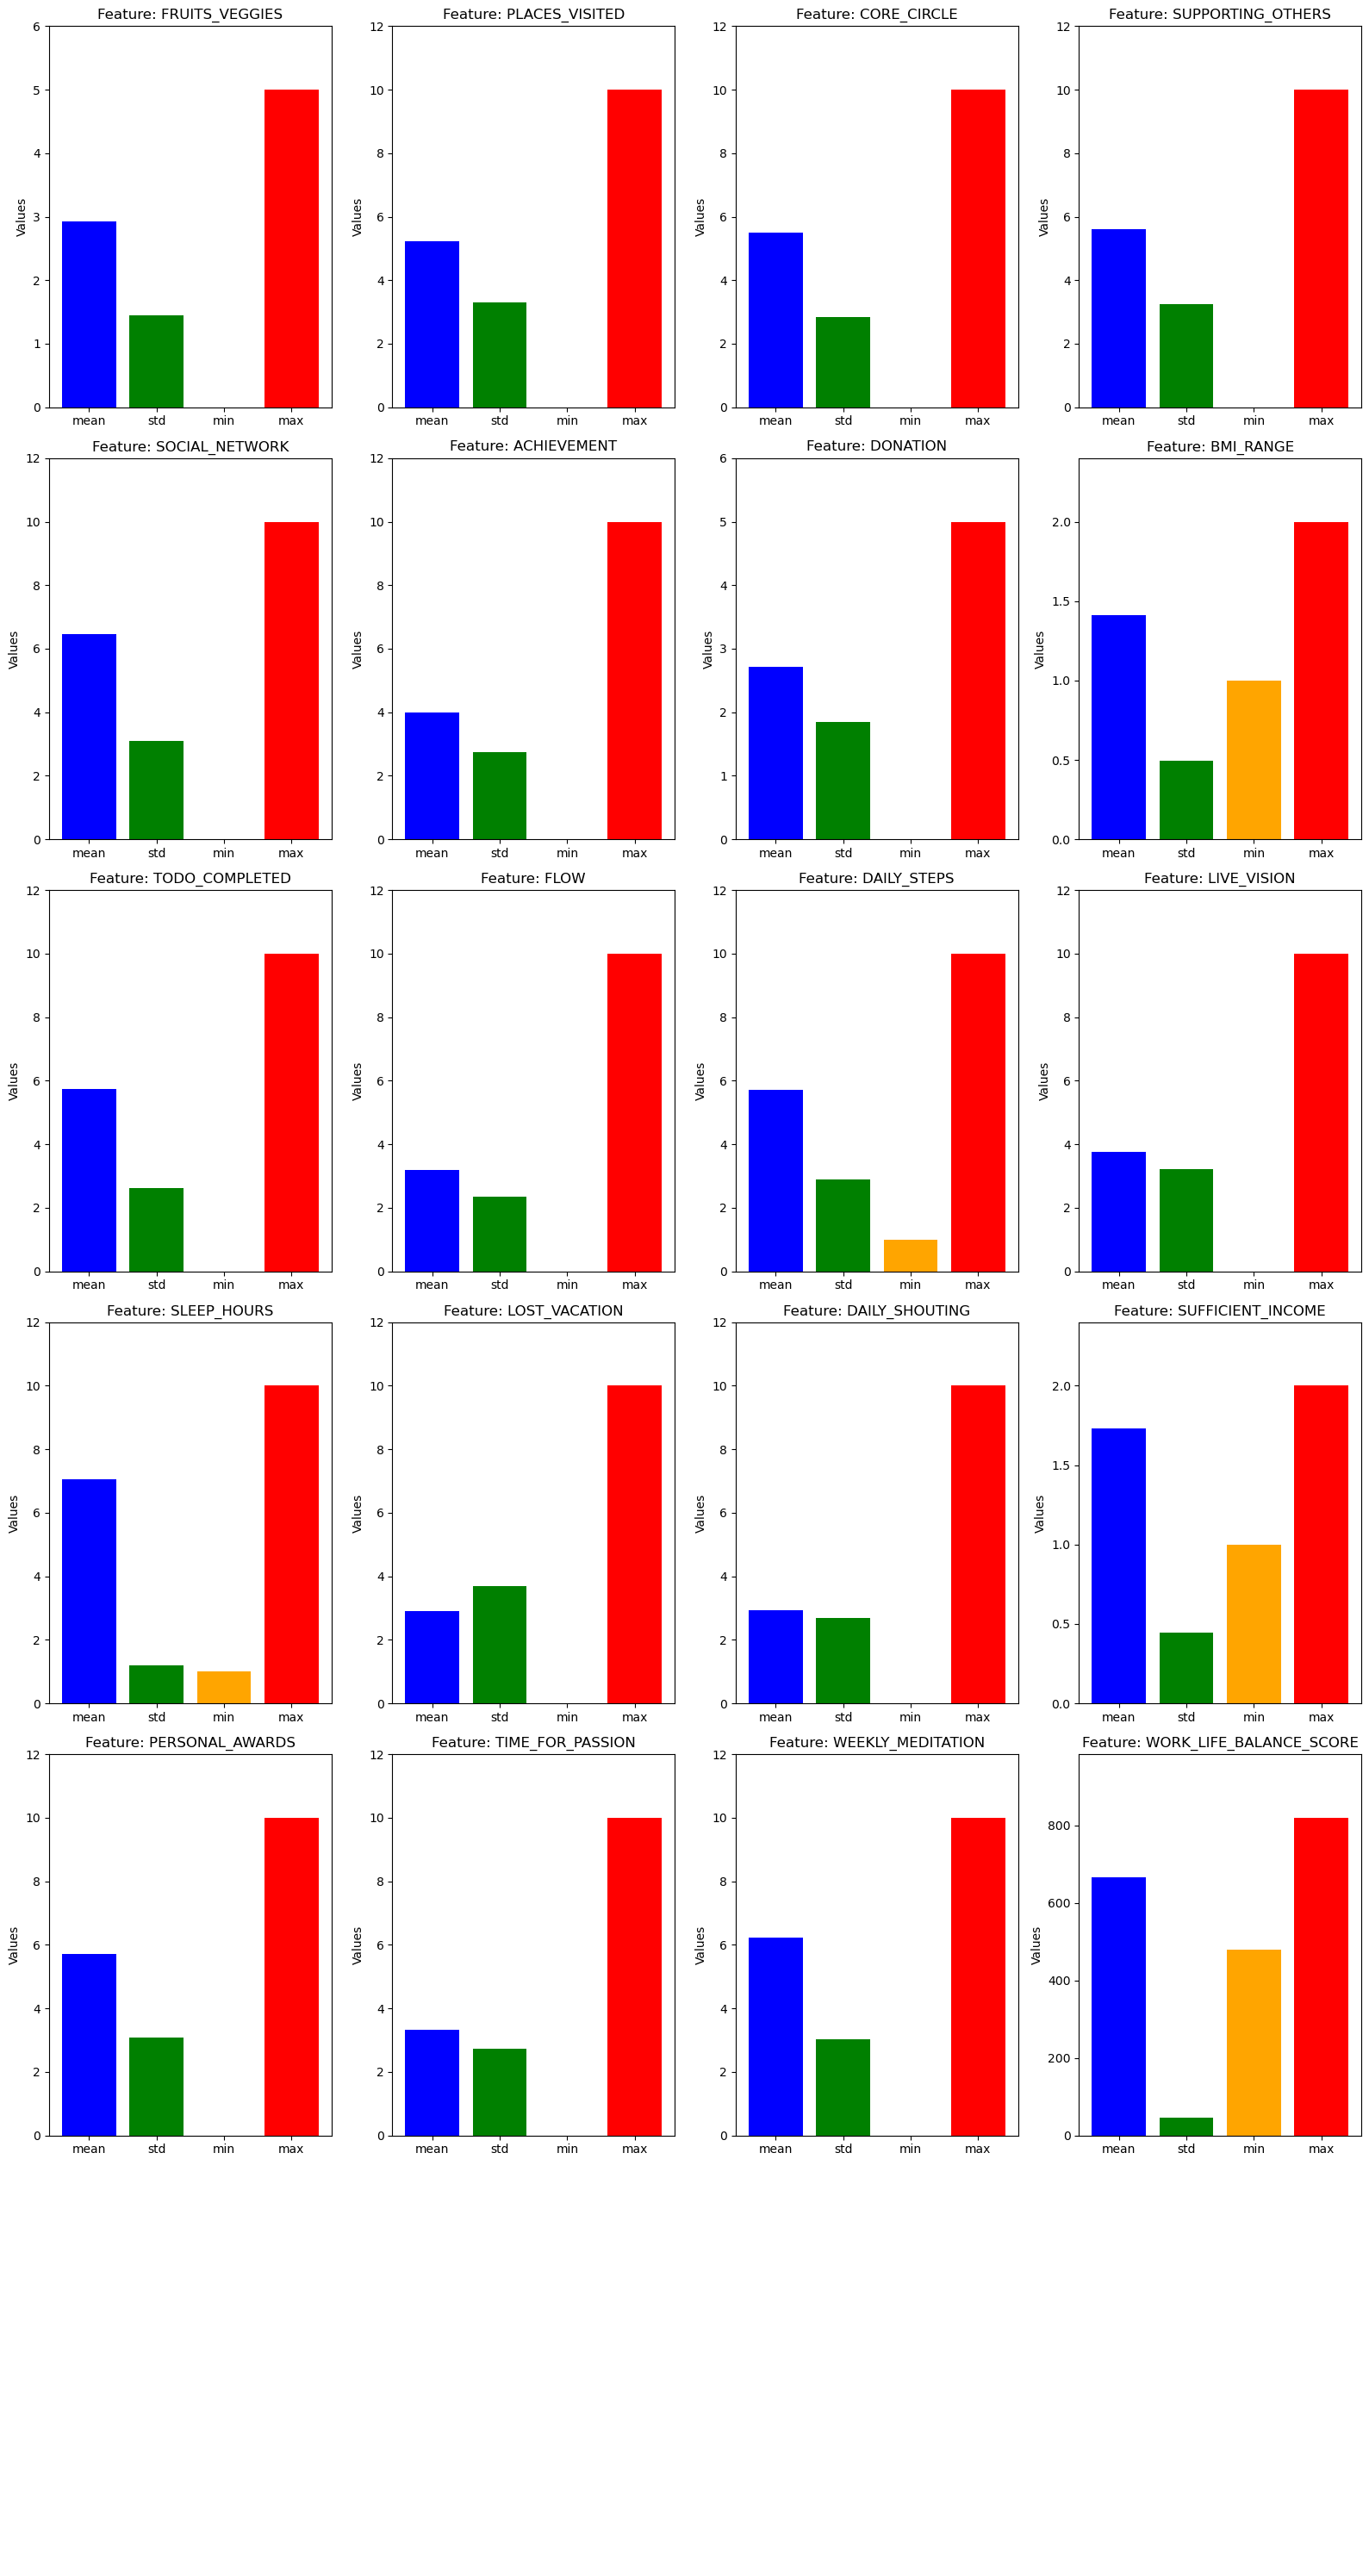

In [ ]:
# Get the describe summary (mean, max, min, std)
summary = df.describe().loc[['mean', 'std', 'min', 'max']]

# Set the number of rows and columns for subplots
n_features = len(df.columns)
ncols = 4  # 4 columns per row
nrows = int(np.ceil(n_features / ncols))  # Calculate the required number of rows

# Create subplots with the specified layout
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 5 * nrows))

# Flatten axes array to make indexing easier
axes = axes.flatten()

# Plotting each feature with bars representing mean, std, min, max
for i, column in enumerate(summary.columns):
    stats = summary[column]
    axes[i].bar(stats.index, stats.values, color=['blue', 'green', 'orange', 'red'])
    axes[i].set_title(f"Feature: {column}")
    axes[i].set_ylabel("Values")
    axes[i].set_ylim([0, max(stats.values) * 1.2])  # Set y-limit to ensure bars fit

# Hide any unused axes (if there are fewer features than subplots)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [19]:
summary = df.describe().loc[['mean', 'std', 'min', 'max']]
summary.columns

Index(['FRUITS_VEGGIES', 'PLACES_VISITED', 'CORE_CIRCLE', 'SUPPORTING_OTHERS',
       'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION', 'BMI_RANGE',
       'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION', 'SLEEP_HOURS',
       'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME',
       'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION',
       'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')

In [20]:
df['MONTH'] = pd.DatetimeIndex(df['Timestamp']).month

In [22]:
df2 = df.pivot_table(values='BMI_RANGE', index=['AGE'], columns=['GENDER'], )
df2.head()

GENDER,Female,Male
AGE,,
20 or less,1.226291,1.224138
21 to 35,1.357809,1.327620
36 to 50,1.465046,1.521842
51 or more,1.525535,1.524113


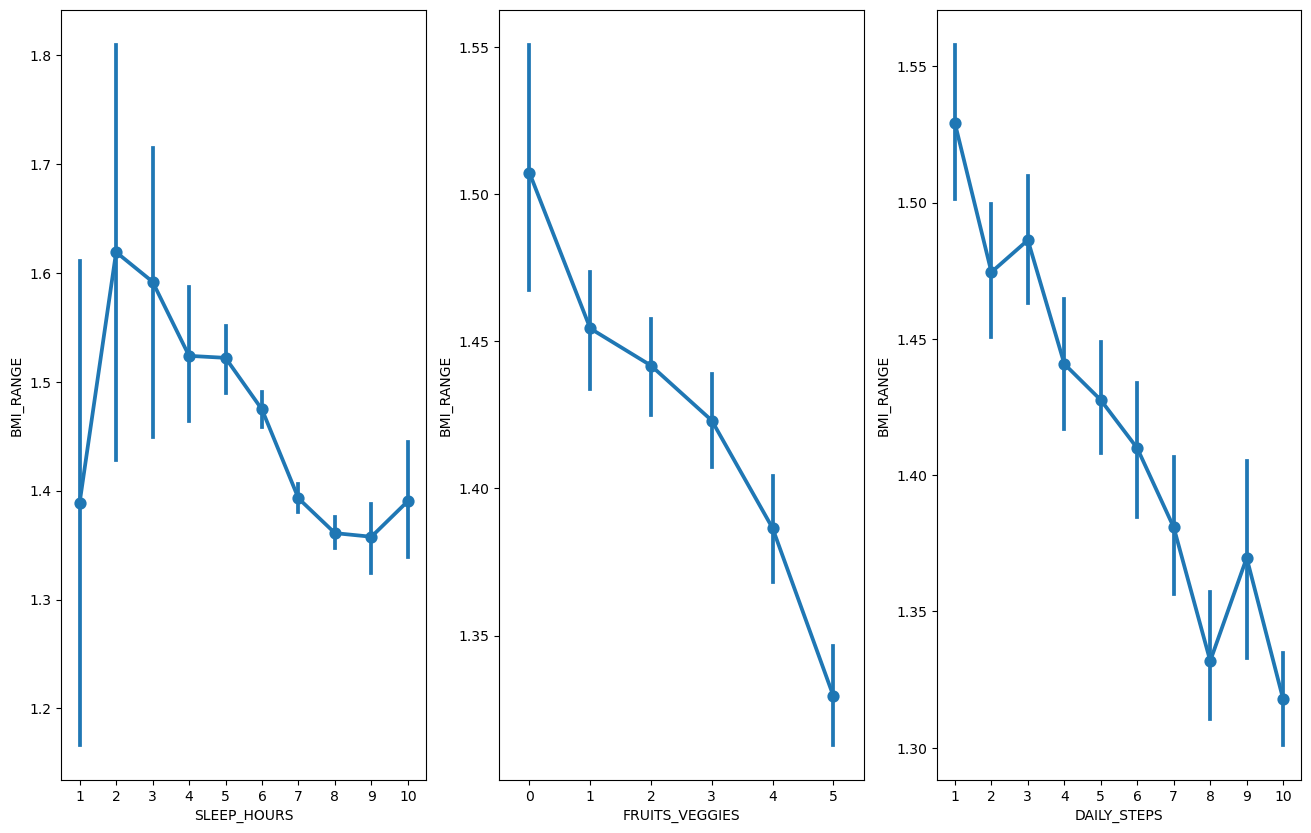

In [76]:
f,ax = plt.subplots(1,3,figsize=(16,10))


sns.pointplot(x = 'SLEEP_HOURS', y = 'BMI_RANGE',  data=df, ax = ax[0])
sns.pointplot(x = 'FRUITS_VEGGIES', y = 'BMI_RANGE', data=df, ax = ax[1])
sns.pointplot(x = 'DAILY_STEPS', y = 'BMI_RANGE',  data=df, ax = ax[2])

plt.show()

<Axes: xlabel='AGE'>

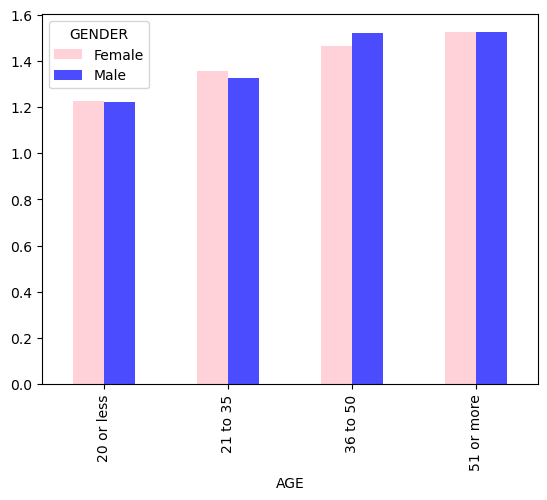

In [70]:
df2.plot(kind='bar', color=('pink', 'blue'), alpha=0.7,)

In [36]:
df.loc[10005,"DAILY_STRESS"] = np.int64(1)

In [37]:
df["DAILY_STRESS"] = df["DAILY_STRESS"].astype(np.int64)

In [ ]:
df["DAILY_STRESS"] = df["DAILY_STRESS"].astype(np.int64)

In [38]:
df.dtypes

Timestamp                   object
FRUITS_VEGGIES               int64
DAILY_STRESS                 int64
PLACES_VISITED               int64
CORE_CIRCLE                  int64
SUPPORTING_OTHERS            int64
SOCIAL_NETWORK               int64
ACHIEVEMENT                  int64
DONATION                     int64
BMI_RANGE                    int64
TODO_COMPLETED               int64
FLOW                         int64
DAILY_STEPS                  int64
LIVE_VISION                  int64
SLEEP_HOURS                  int64
LOST_VACATION                int64
DAILY_SHOUTING               int64
SUFFICIENT_INCOME            int64
PERSONAL_AWARDS              int64
TIME_FOR_PASSION             int64
WEEKLY_MEDITATION            int64
AGE                         object
GENDER                      object
WORK_LIFE_BALANCE_SCORE    float64
MONTH                        int32
dtype: object

In [39]:
df3 = df.pivot_table(values='DAILY_STRESS', index=['AGE'], columns=['GENDER'], )
df3.head()

GENDER,Female,Male
AGE,,
20 or less,3.045070,2.347480
21 to 35,2.992375,2.569147
36 to 50,2.948666,2.799292
51 or more,2.728939,2.418562


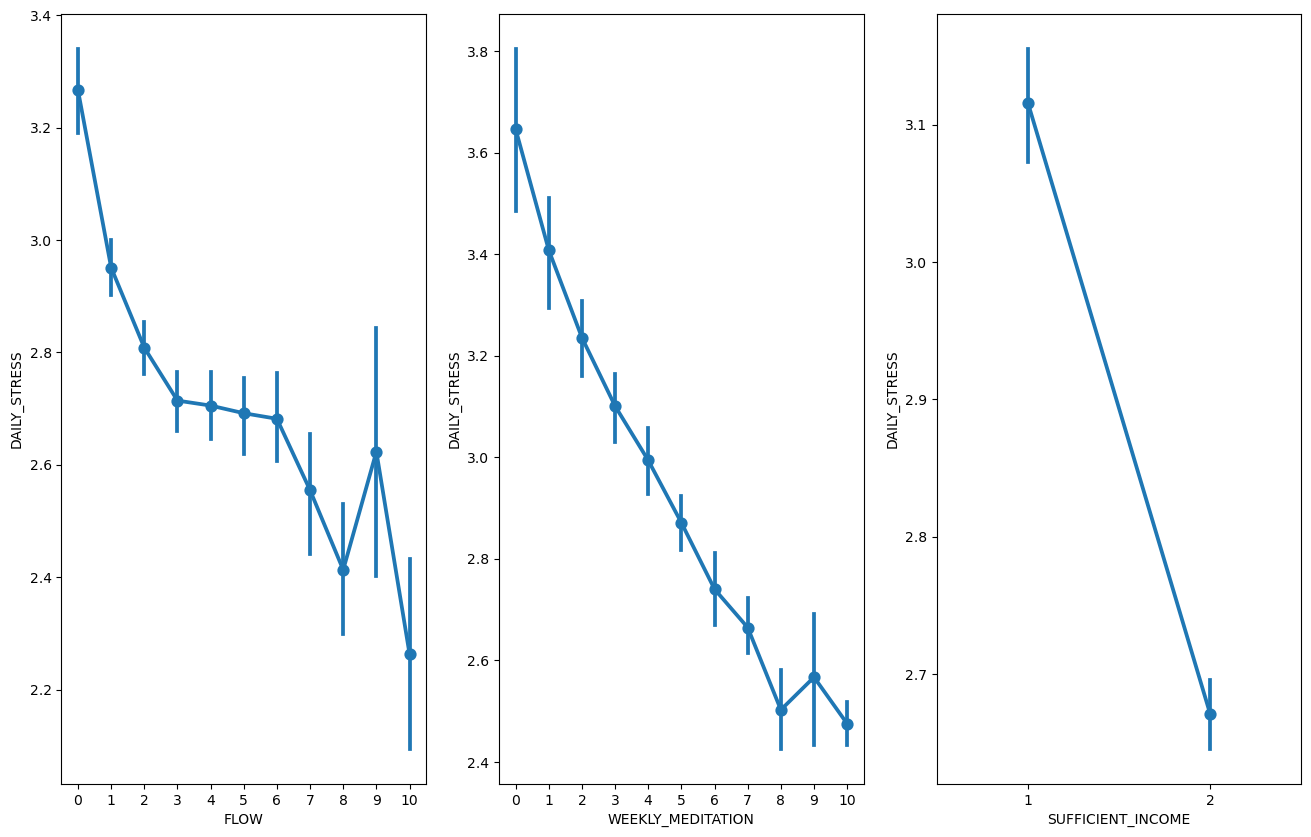

In [ ]:
f,ax = plt.subplots(1,3,figsize=(16,10))


sns.pointplot(x = 'FLOW', y = 'DAILY_STRESS',  data=df, ax = ax[0])
sns.pointplot(x = 'WEEKLY_MEDITATION', y = 'DAILY_STRESS', data=df, ax = ax[1])
sns.pointplot(x = 'SUFFICIENT_INCOME', y = 'DAILY_STRESS',  data=df, ax = ax[2])

plt.show()
#INCOME 2 is suff

<Axes: xlabel='AGE'>

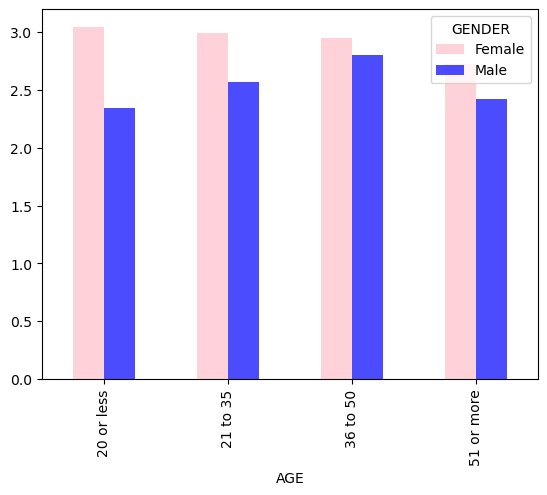

In [42]:
df3.plot(kind='bar', color=('pink', 'blue'), alpha=0.7)


In [43]:
df4 = df.pivot_table(values='ACHIEVEMENT', index=['AGE'], columns=['GENDER'], )
df4.head()

GENDER,Female,Male
AGE,,
20 or less,4.352113,4.086207
21 to 35,3.887602,3.781067
36 to 50,3.996285,4.156434
51 or more,4.012222,4.227480


In [78]:
def plot_relationships(df, var1, var2, var3):
    """
    Function to create subplots showing the relationship between various variables and DAILY_STRESS/BMI.
    
    Parameters:
    - df: DataFrame containing the data.
    - var1, var2, var3: Columns in df to plot on x-axis.
    - title1, title2, title3: Titles for the subplots.
    """
    f, ax = plt.subplots(1, 3, figsize=(16, 10))
    
    # Set subplot titles
    ax[0].set_title(1)
    ax[1].set_title(2)
    ax[2].set_title(3)
    
    # Create the pointplots for each pair of variables
    sns.pointplot(x=var1[0], y=var1[1], data=df, ax=ax[0])
    sns.pointplot(x=var2[0], y=var2[1], data=df, ax=ax[1])
    sns.pointplot(x=var3[0], y=var3[1], data=df, ax=ax[2])
    
    # Display the plot
    plt.show()

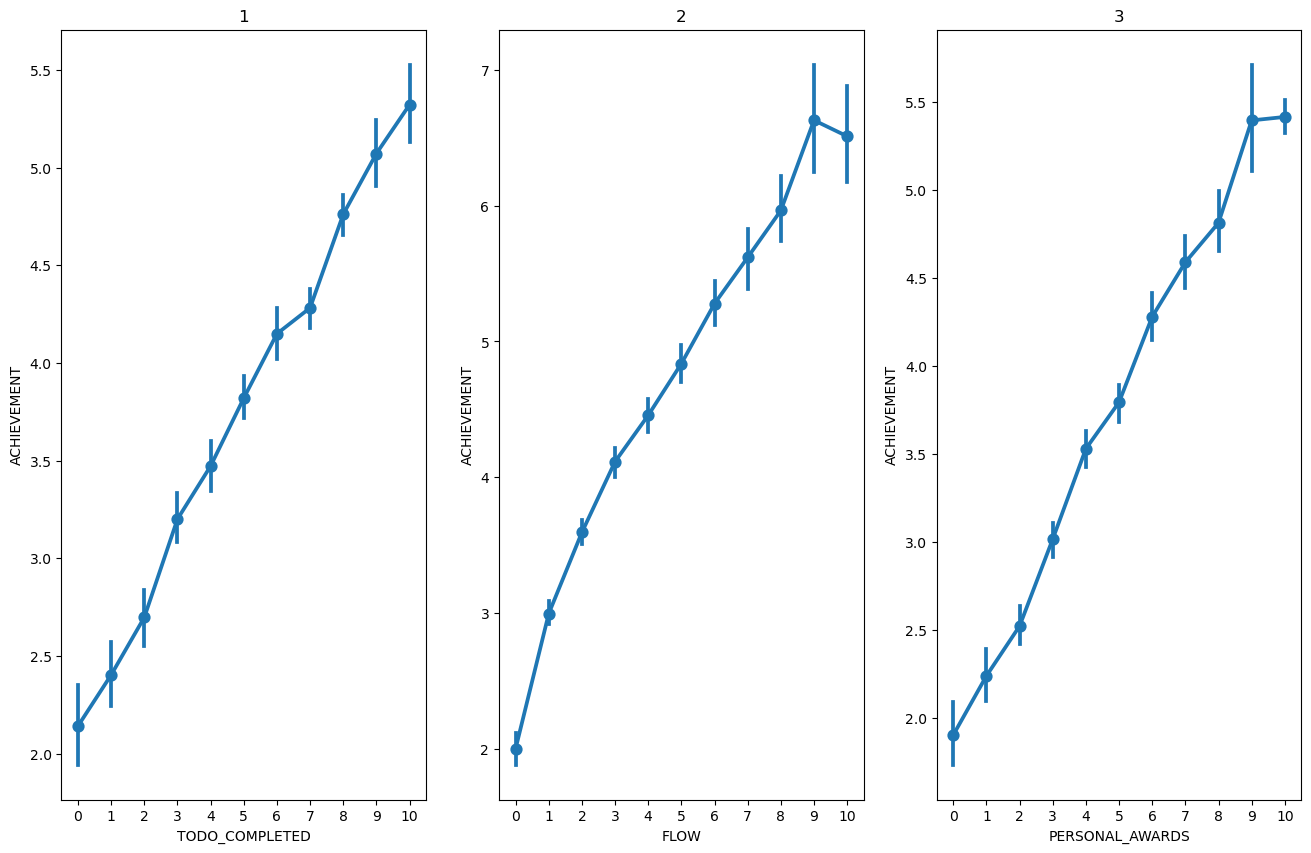

In [79]:
plot_relationships(df, 
                   ('TODO_COMPLETED', 'ACHIEVEMENT'),
                   ('FLOW', 'ACHIEVEMENT'),
                   ('PERSONAL_AWARDS', 'ACHIEVEMENT'))

<Axes: xlabel='AGE'>

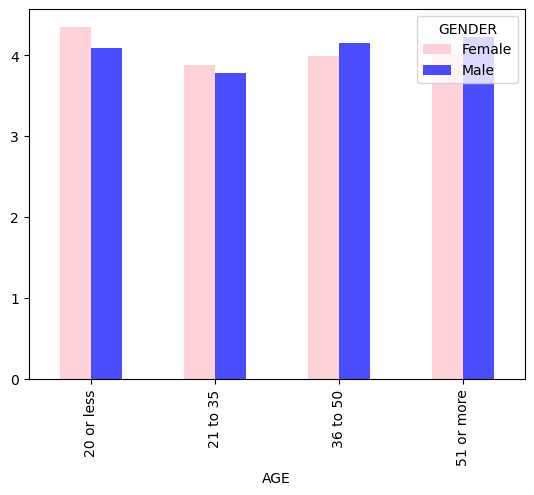

In [48]:
df4.plot(kind='bar', color=('pink', 'blue'), alpha=0.7)



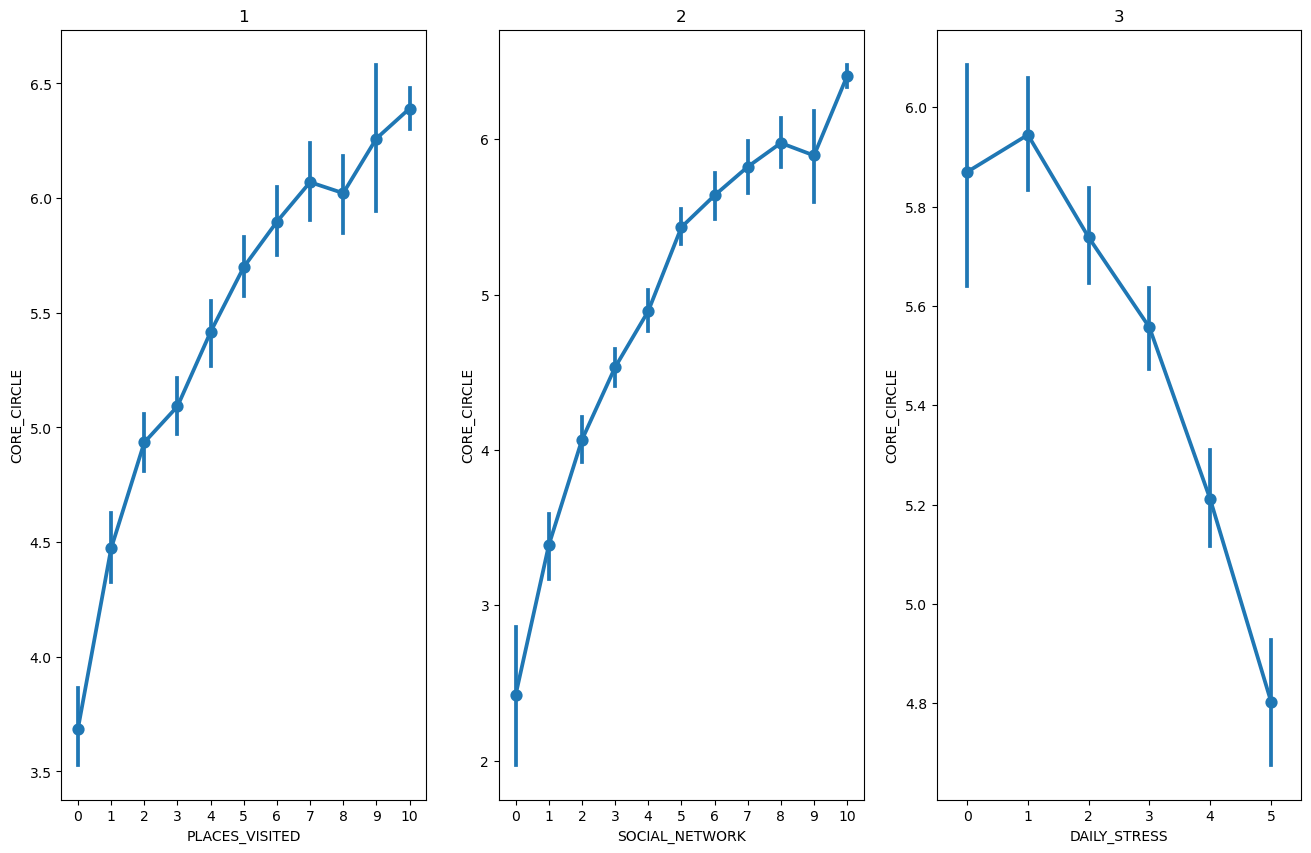

In [ ]:
# CORE_CIRCLE
plot_relationships(df, 
                   ('PLACES_VISITED', 'CORE_CIRCLE'),
                   ('SOCIAL_NETWORK', 'CORE_CIRCLE'),
                   ('DAILY_STRESS', 'CORE_CIRCLE'),
                   1,2,3)

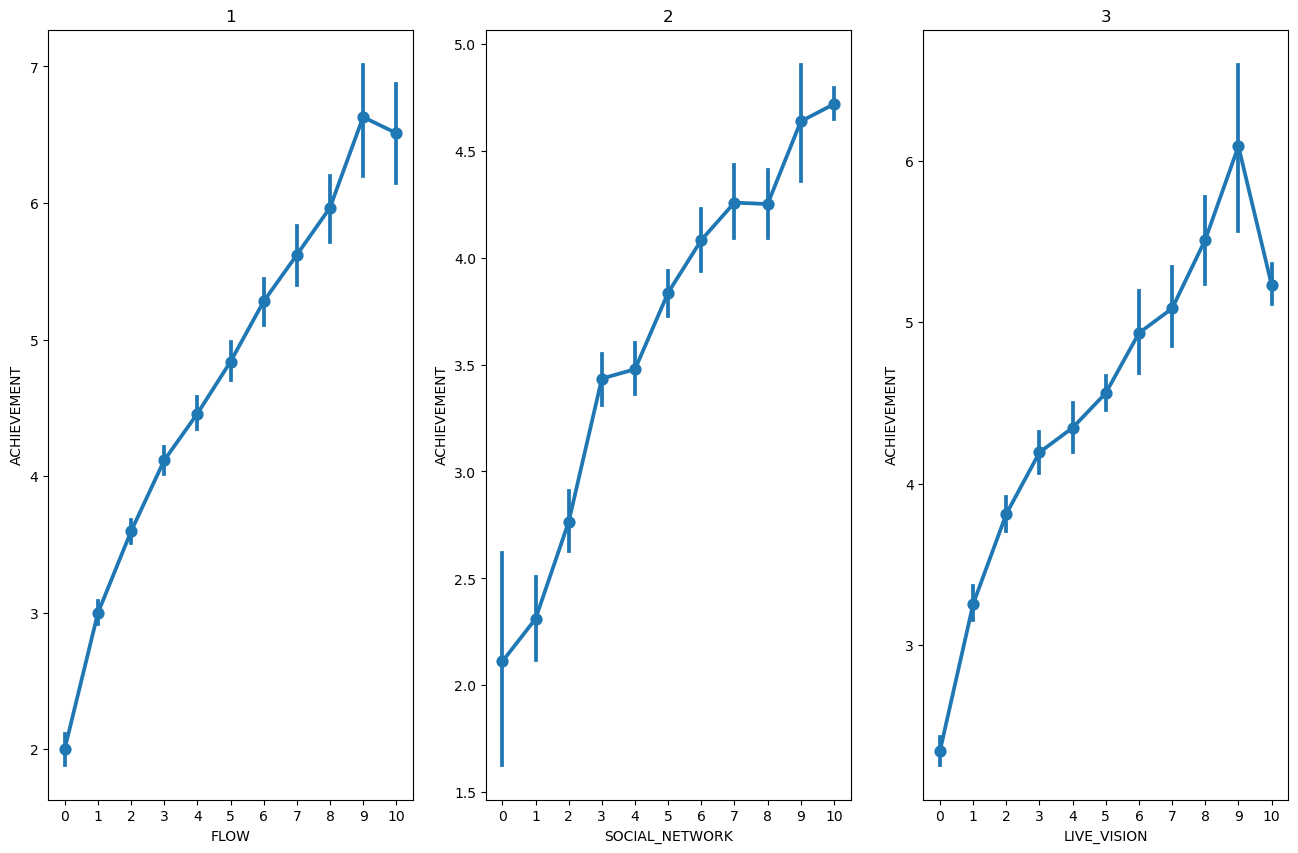

In [58]:
plot_relationships(df, 
                   ('FLOW', 'ACHIEVEMENT'),
                   ('SOCIAL_NETWORK', 'ACHIEVEMENT'),
                   ('LIVE_VISION', 'ACHIEVEMENT'),
                   1,2,3)

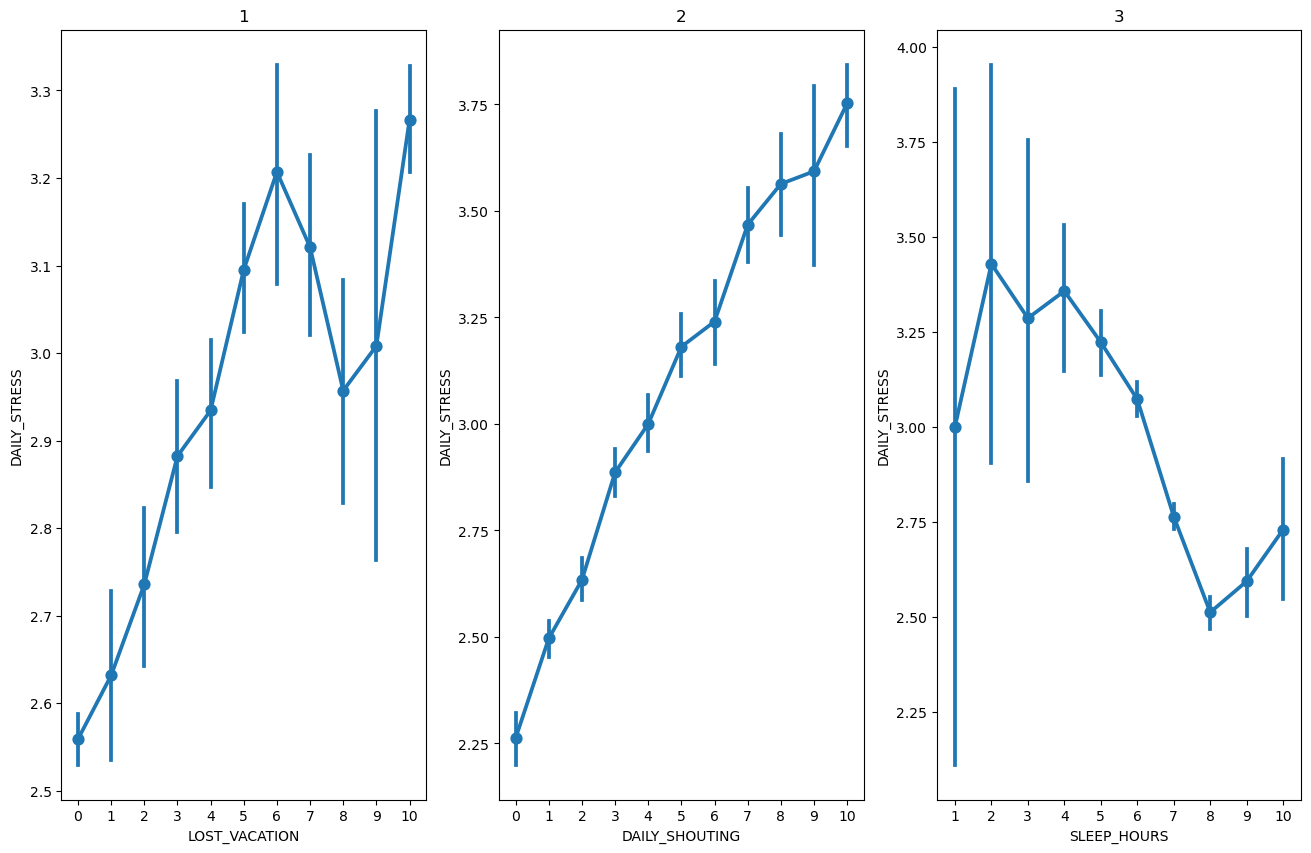

In [62]:
plot_relationships(df, 
                   ('LOST_VACATION', 'DAILY_STRESS'),
                   ('DAILY_SHOUTING', 'DAILY_STRESS'),
                   ('SLEEP_HOURS', 'DAILY_STRESS'),
                   1,2,3)

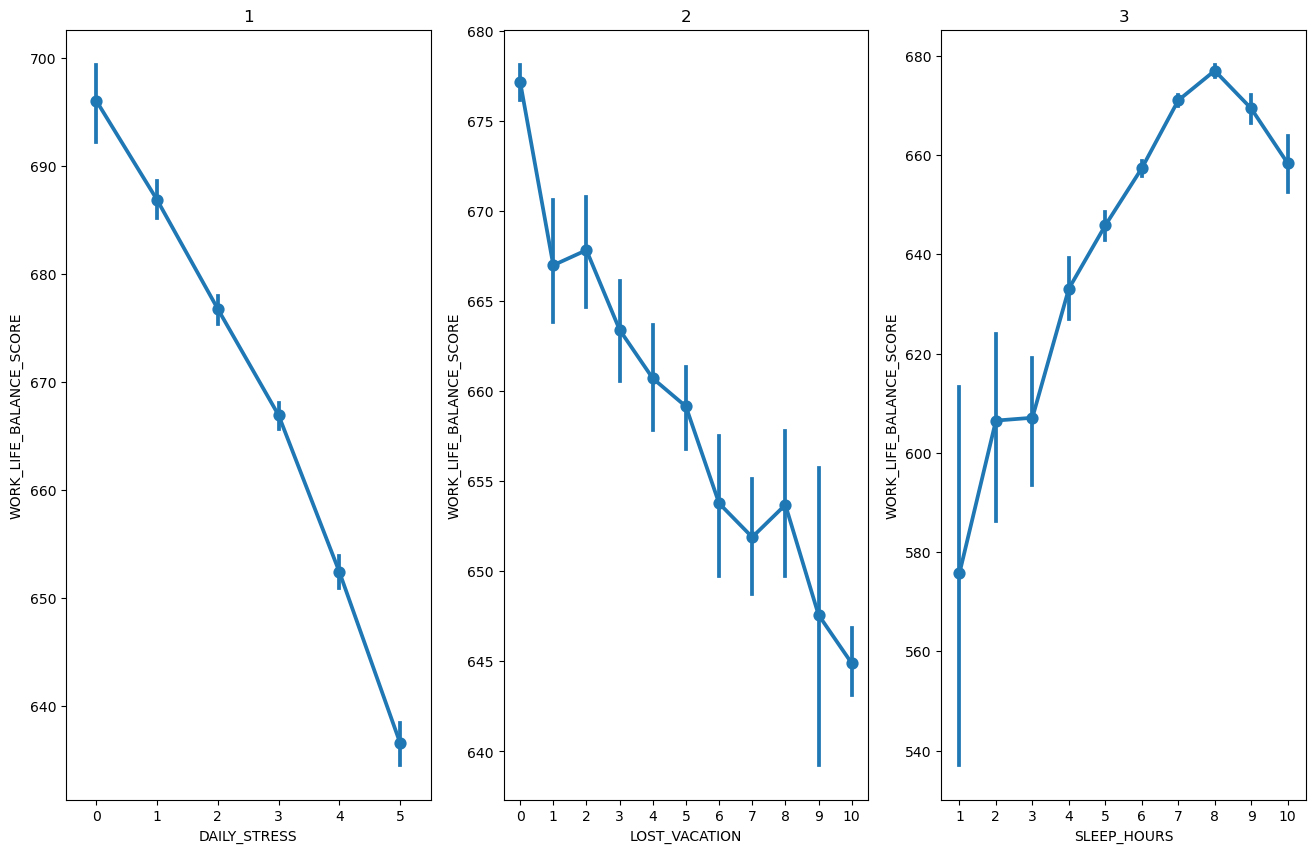

In [63]:
plot_relationships(df, 
                   ('DAILY_STRESS', 'WORK_LIFE_BALANCE_SCORE'),
                   ('LOST_VACATION', 'WORK_LIFE_BALANCE_SCORE'),
                   ('SLEEP_HOURS', 'WORK_LIFE_BALANCE_SCORE'),
                   1,2,3)

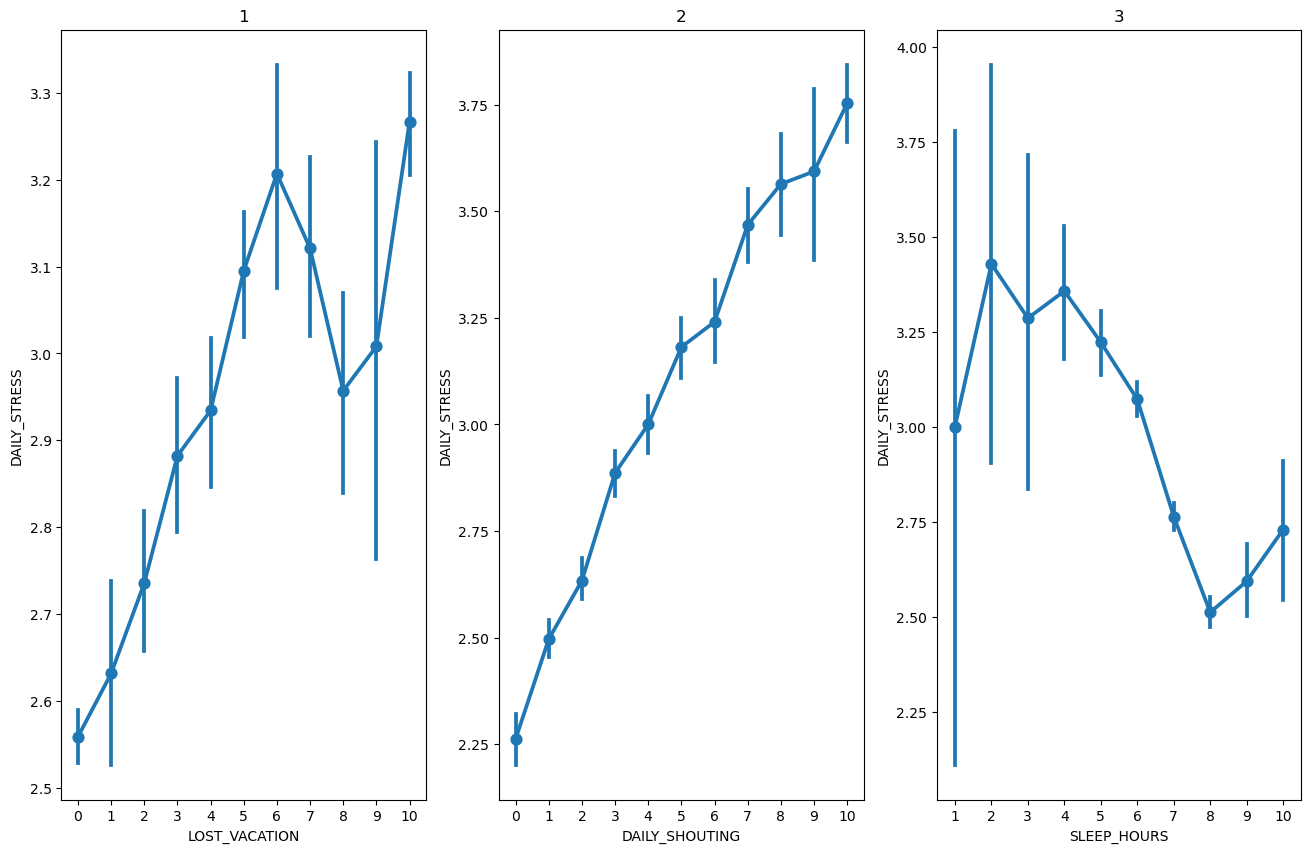

In [ ]:
plot_relationships(df, 
                   ('PERSONAL_AWARDS', 'WORK_LIFE_BALANCE_SCORE'),
                   ('LOST_VACATION', 'WORK_LIFE_BALANCE_SCORE'),
                   ('SLEEP_HOURS', 'WORK_LIFE_BALANCE_SCORE'),
                   1,2,3)

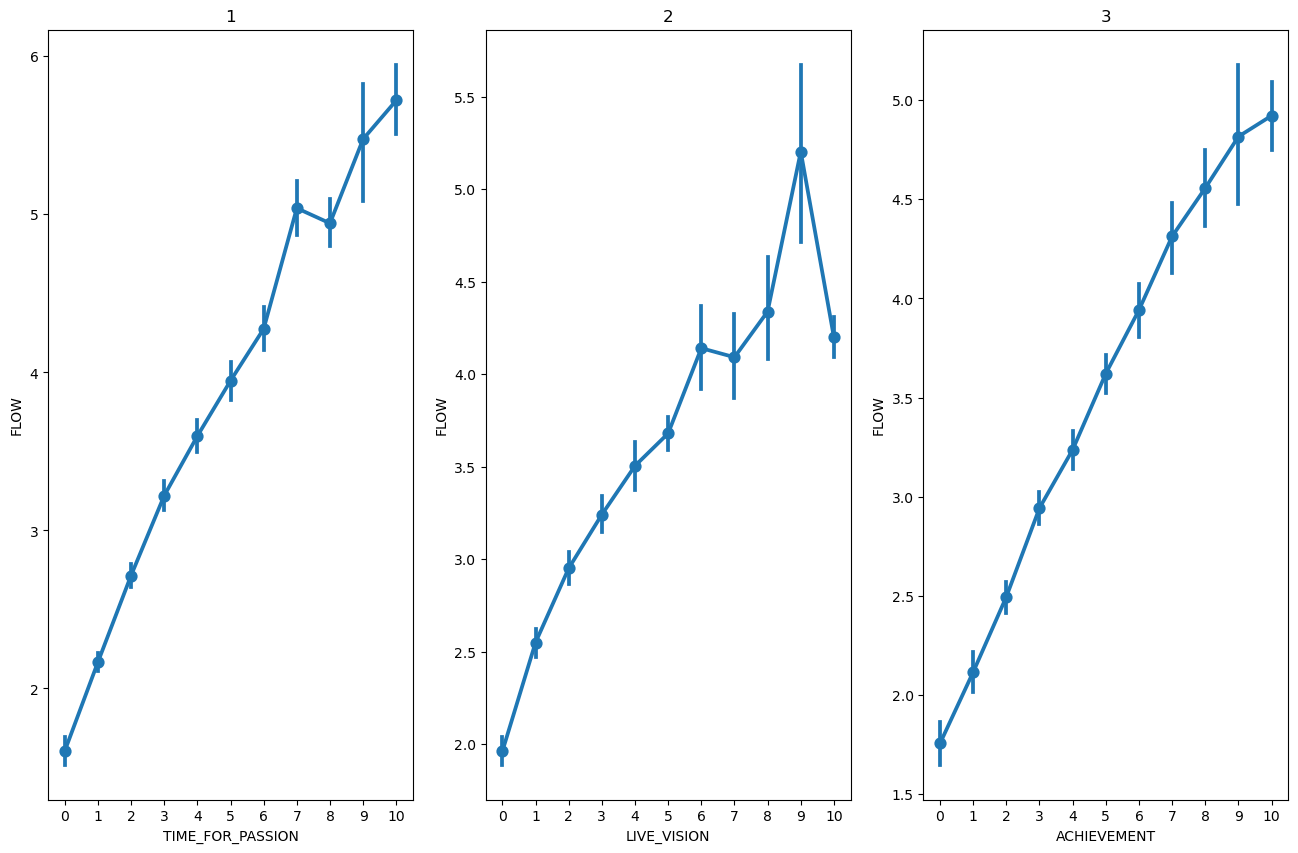

In [66]:
plot_relationships(df, 
                   ('TIME_FOR_PASSION', 'FLOW'),
                   ('LIVE_VISION', 'FLOW'),
                   ('ACHIEVEMENT', 'FLOW'),
                   1,2,3)

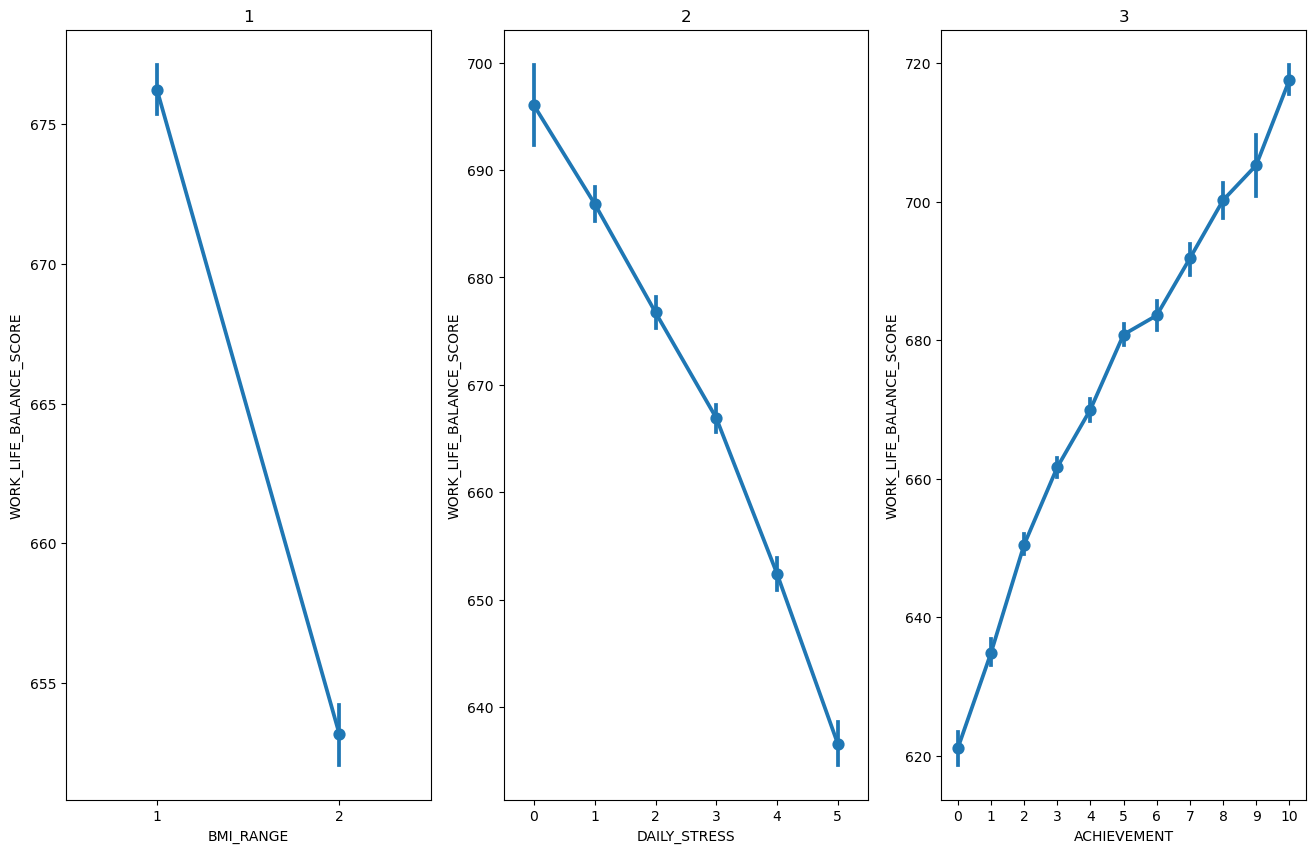

In [69]:
plot_relationships(df, 
                   ('BMI_RANGE', 'WORK_LIFE_BALANCE_SCORE'),
                   ('DAILY_STRESS', 'WORK_LIFE_BALANCE_SCORE'),
                   ('ACHIEVEMENT', 'WORK_LIFE_BALANCE_SCORE'),
                   1,2,3)